# Suscripción de clientes de bancos portugueses a un depósito trimestral (Producto)


## Campaña de marketing

1. Fuentes
   Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012
   
2. Uso pasado:

      El conjunto de datos completo fue descrito y analizado por:

      S. Moro, R. Laureano y P. Cortez. Utilización de la Minería de Datos para el Marketing Directo Bancario: Una Aplicación de la Metodología CRISP-DM.
      En P. Novais et al. (Eds.), Actas de la Conferencia Europea de Simulación y Modelado - ESM'2011, pp. 117-121, Guimarães, Portugal, octubre de 2011. EUROSIS.

3. Información relevante:

   Los datos están relacionados con campañas de marketing de una institución portuguesa de bancos. 
   Las campañas de marketing fueron realizadas por llamadas móviles.A menudo,se requirió más de un contacto al mismo cliente para determinar si el producto (depósito trimestral bancario) sería o no suscrito. 

   El objetivo es predecir si el client se suscribirá a esa subscripción (variable y en el csv).

4. Número de filas: 45211

5. Numero de variables: 16 + salida.

## Descripción de las variables.


* age (numeric)
* job : type of job (categorical: "admin","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") 
* marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
* education (categorical: "unknown","secondary","primary","tertiary")
* default: has credit in default? (binary: "yes","no")
* balance: average yearly balance, in euros (numeric) 
* housing: has housing loan? (binary: "yes","no")
* loan: has personal loan? (binary: "yes","no")

Related with the last contact of the current campaign:
* contact: contact communication type (categorical: "unknown","telephone","cellular") 
* day: last contact day of the month (numeric)
* month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
* duration: last contact duration, in seconds (numeric)

ther attributes:
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):
* y - has the client subscribed a term deposit? (binary: "yes","no")

# Carga del csv.

Cargamos el csv que esta alojado en mi repositorio de github, para este caso los datos a tratar es un csv que viene con las características anteriormente dichas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import MaxAbsScaler

url = 'https://raw.githubusercontent.com/alexander6779/SNS/main/Final_Project/bank_data/'

df = pd.read_csv(url+'bank-full.csv',sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Mostrar información de los datos.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Limpieza de datos nulos y transformación de datos

In [3]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Podemos observar que no hay ningún valor nulo, por tanto no tendremos que rellenar dichos valores.

In [4]:
months = {'jan':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11}
job = {'admin.':0,'unknown':1,'unemployed':2,'management':3,'housemaid':4,'entrepreneur':5,'student':6,'blue-collar':7,'self-employed':8,'retired':9,'technician':10,'services':11}
marital = {'married':0,'divorced':1,'single':2}
housing = {'no':0,'yes':1}
loan = {'no':0,'yes':1}
default = {'no':0,'yes':1}
education = {'unknown':0,'primary':1,'secondary':2,'tertiary':3}
contact = {'unknown':0,'telephone':1,'cellular':2}
poutcome = {'unknown':0,'success':1,'failure':2,'other':3}
y = {'no':0,'yes':1}

In [5]:
def fromCatToNum(datafr):
    cols = ['month','job','marital','housing','loan','default','education','contact','poutcome','y']
    values = {'month':months,'job':job,'marital':marital,'housing':housing,'loan':loan,'default':default,'education':education,'contact':contact,'poutcome':poutcome,'y':y}
    for i in datafr:
        if i in cols:
            datafr[i] = datafr[i].map(values[i])
fromCatToNum(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


# Eliminación de outliers

En esta primera celda vamos a guardar todas las filas las cuáles tengan un valor a 1 en la columna default, debido a que todas ellas las va a considerar un outlier, por qué, pues no encuentro una opinión que lo pueda aclarar, entiendo que puede haber una de esas filas que en general posea valores que están fuera de rango pero no todas, por tanto he decidido guardarlas y añadirlas posterior al borrado de outliers.

In [7]:
filas_default = df.loc[df['default']==1]

In [8]:
for i in df:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df[(df[i] > up) | (df[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

age yes
job no
marital no
education yes
default yes
balance yes
housing no
loan yes
contact no
day no
month no
duration yes
campaign yes
pdays yes
previous yes
poutcome yes
y yes


In [9]:
media = df.mean()
desvio = df.std()
limite_superior = media + 3 * desvio
limite_inferior = media - 3 * desvio
outliers = df[(df > limite_superior) | (df < limite_inferior)].stack()

print("Media: ", media)
print()
print("Desviación estándar: ", desvio)
print()
print("Limite Superior: ", limite_superior)
print()
print("Limite Inferior: ", limite_inferior)
print()
print("Outliers: ", outliers)

Media:  age            40.936210
job             6.018159
marital         0.680963
education       2.060516
default         0.018027
balance      1362.272058
housing         0.555838
loan            0.160226
contact         1.359758
day            15.806419
month           5.144655
duration      258.163080
campaign        2.763841
pdays          40.197828
previous        0.580323
poutcome        0.372321
y               0.116985
dtype: float64

Desviación estándar:  age            10.618762
job             3.543218
marital         0.884908
education       0.778704
default         0.133049
balance      3044.765829
housing         0.496878
loan            0.366820
contact         0.897951
day             8.322476
month           2.408034
duration      257.527812
campaign        3.098021
pdays         100.128746
previous        2.303441
poutcome        0.833491
y               0.321406
dtype: float64

Limite Superior:  age             72.792496
job             16.647813
marital          3

In [10]:
df.drop(outliers.index.get_level_values(0),inplace=True)

In [11]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,38300.000000,38300.000000,38300.000000,38300.000000,38300.0,38300.000000,38300.000000,38300.000000,38300.000000,38300.000000,38300.000000,38300.000000,38300.000000,38300.000000,38300.000000,38300.000000,38300.000000
mean,40.703003,6.014230,0.673708,2.061358,0.0,1103.449791,0.550078,0.160731,1.316997,15.843890,5.162663,235.626084,2.466057,20.727702,0.289974,0.204151,0.099713
std,10.093718,3.551927,0.883059,0.776556,0.0,1726.616446,0.497492,0.367288,0.917614,8.344106,2.384580,190.269504,1.954914,65.577071,0.960886,0.579436,0.299621
min,18.000000,0.000000,0.000000,0.000000,0.0,-4057.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,3.000000,0.000000,2.000000,0.0,76.000000,0.000000,0.000000,0.000000,8.000000,4.000000,104.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
50%,39.000000,7.000000,0.000000,2.000000,0.0,442.000000,1.000000,0.000000,2.000000,16.000000,5.000000,178.000000,2.000000,-1.000000,0.000000,0.000000,0.000000
75%,48.000000,10.000000,2.000000,3.000000,0.0,1370.000000,1.000000,0.000000,2.000000,21.000000,7.000000,306.000000,3.000000,-1.000000,0.000000,0.000000,0.000000
max,72.000000,11.000000,2.000000,3.000000,0.0,10483.000000,1.000000,1.000000,2.000000,31.000000,11.000000,1030.000000,12.000000,340.000000,7.000000,2.000000,1.000000


In [12]:
len(df)

38300

Aquí añado las filas anteirormente mencionadas.

In [13]:
df = df.append(filas_default,ignore_index=False)
len(df)

39115

Aún así vemos que ha borrado un número considerable de filas.

Comprobamos que finalmente tampoco aparezcan duplicados en nuestro dataframe

In [14]:
df.duplicated().sum() 

0

# Matriz de correlación

La matriz de correlación nos va a ayudar a tomar decisiones para elegir los datos de entrenamiento, de manera que nos va a indicar cuanta correlación existe entre todas las variables, siendo el orden de 1 variable y ver la correlación con todas las demás, así hasta la última.

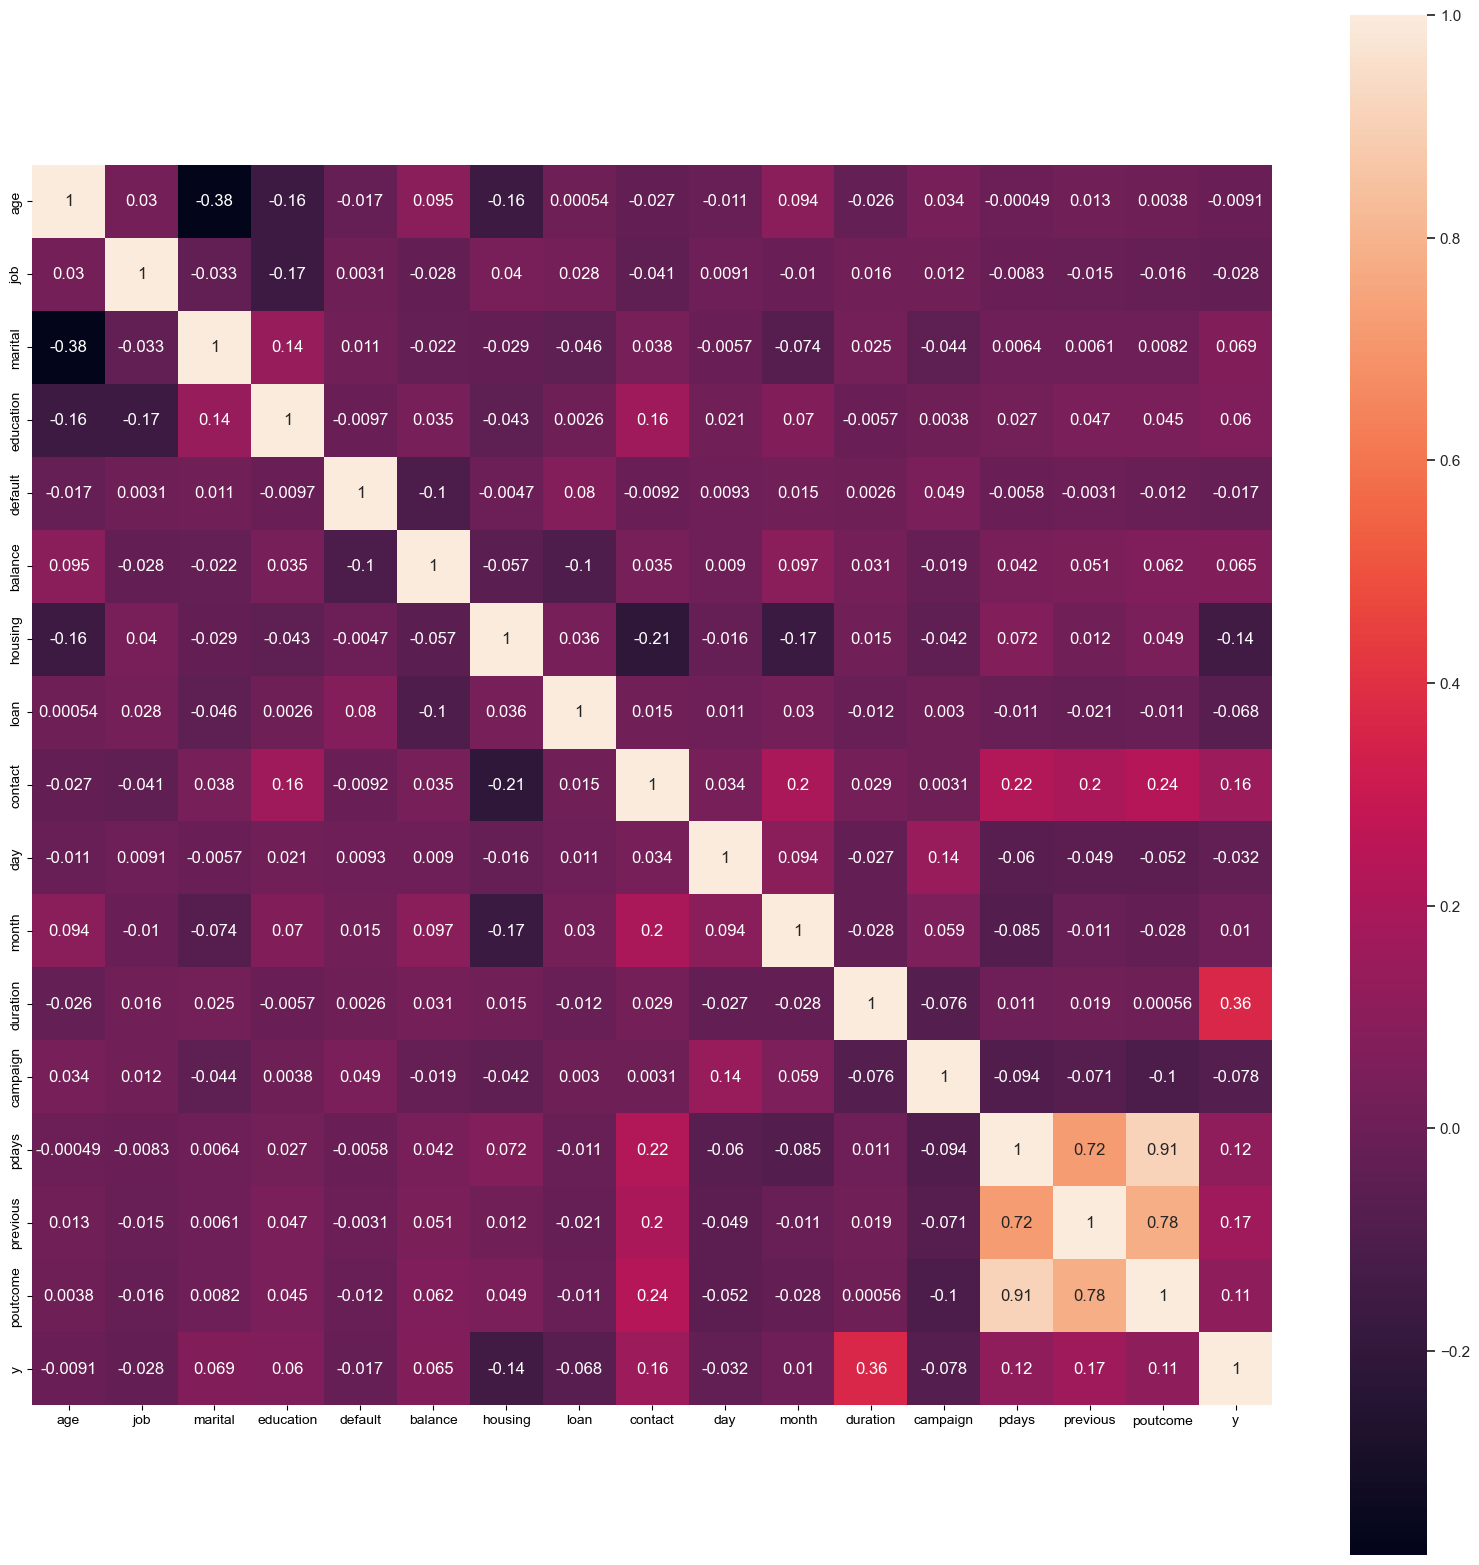

In [15]:
fig,ax = plt.subplots(figsize=(20,20))
sns.set()
sns.heatmap(df.corr(), square=True, annot=True)
plt.show()

# Pairplot

Gráfica para comparar las variables del dataframe.

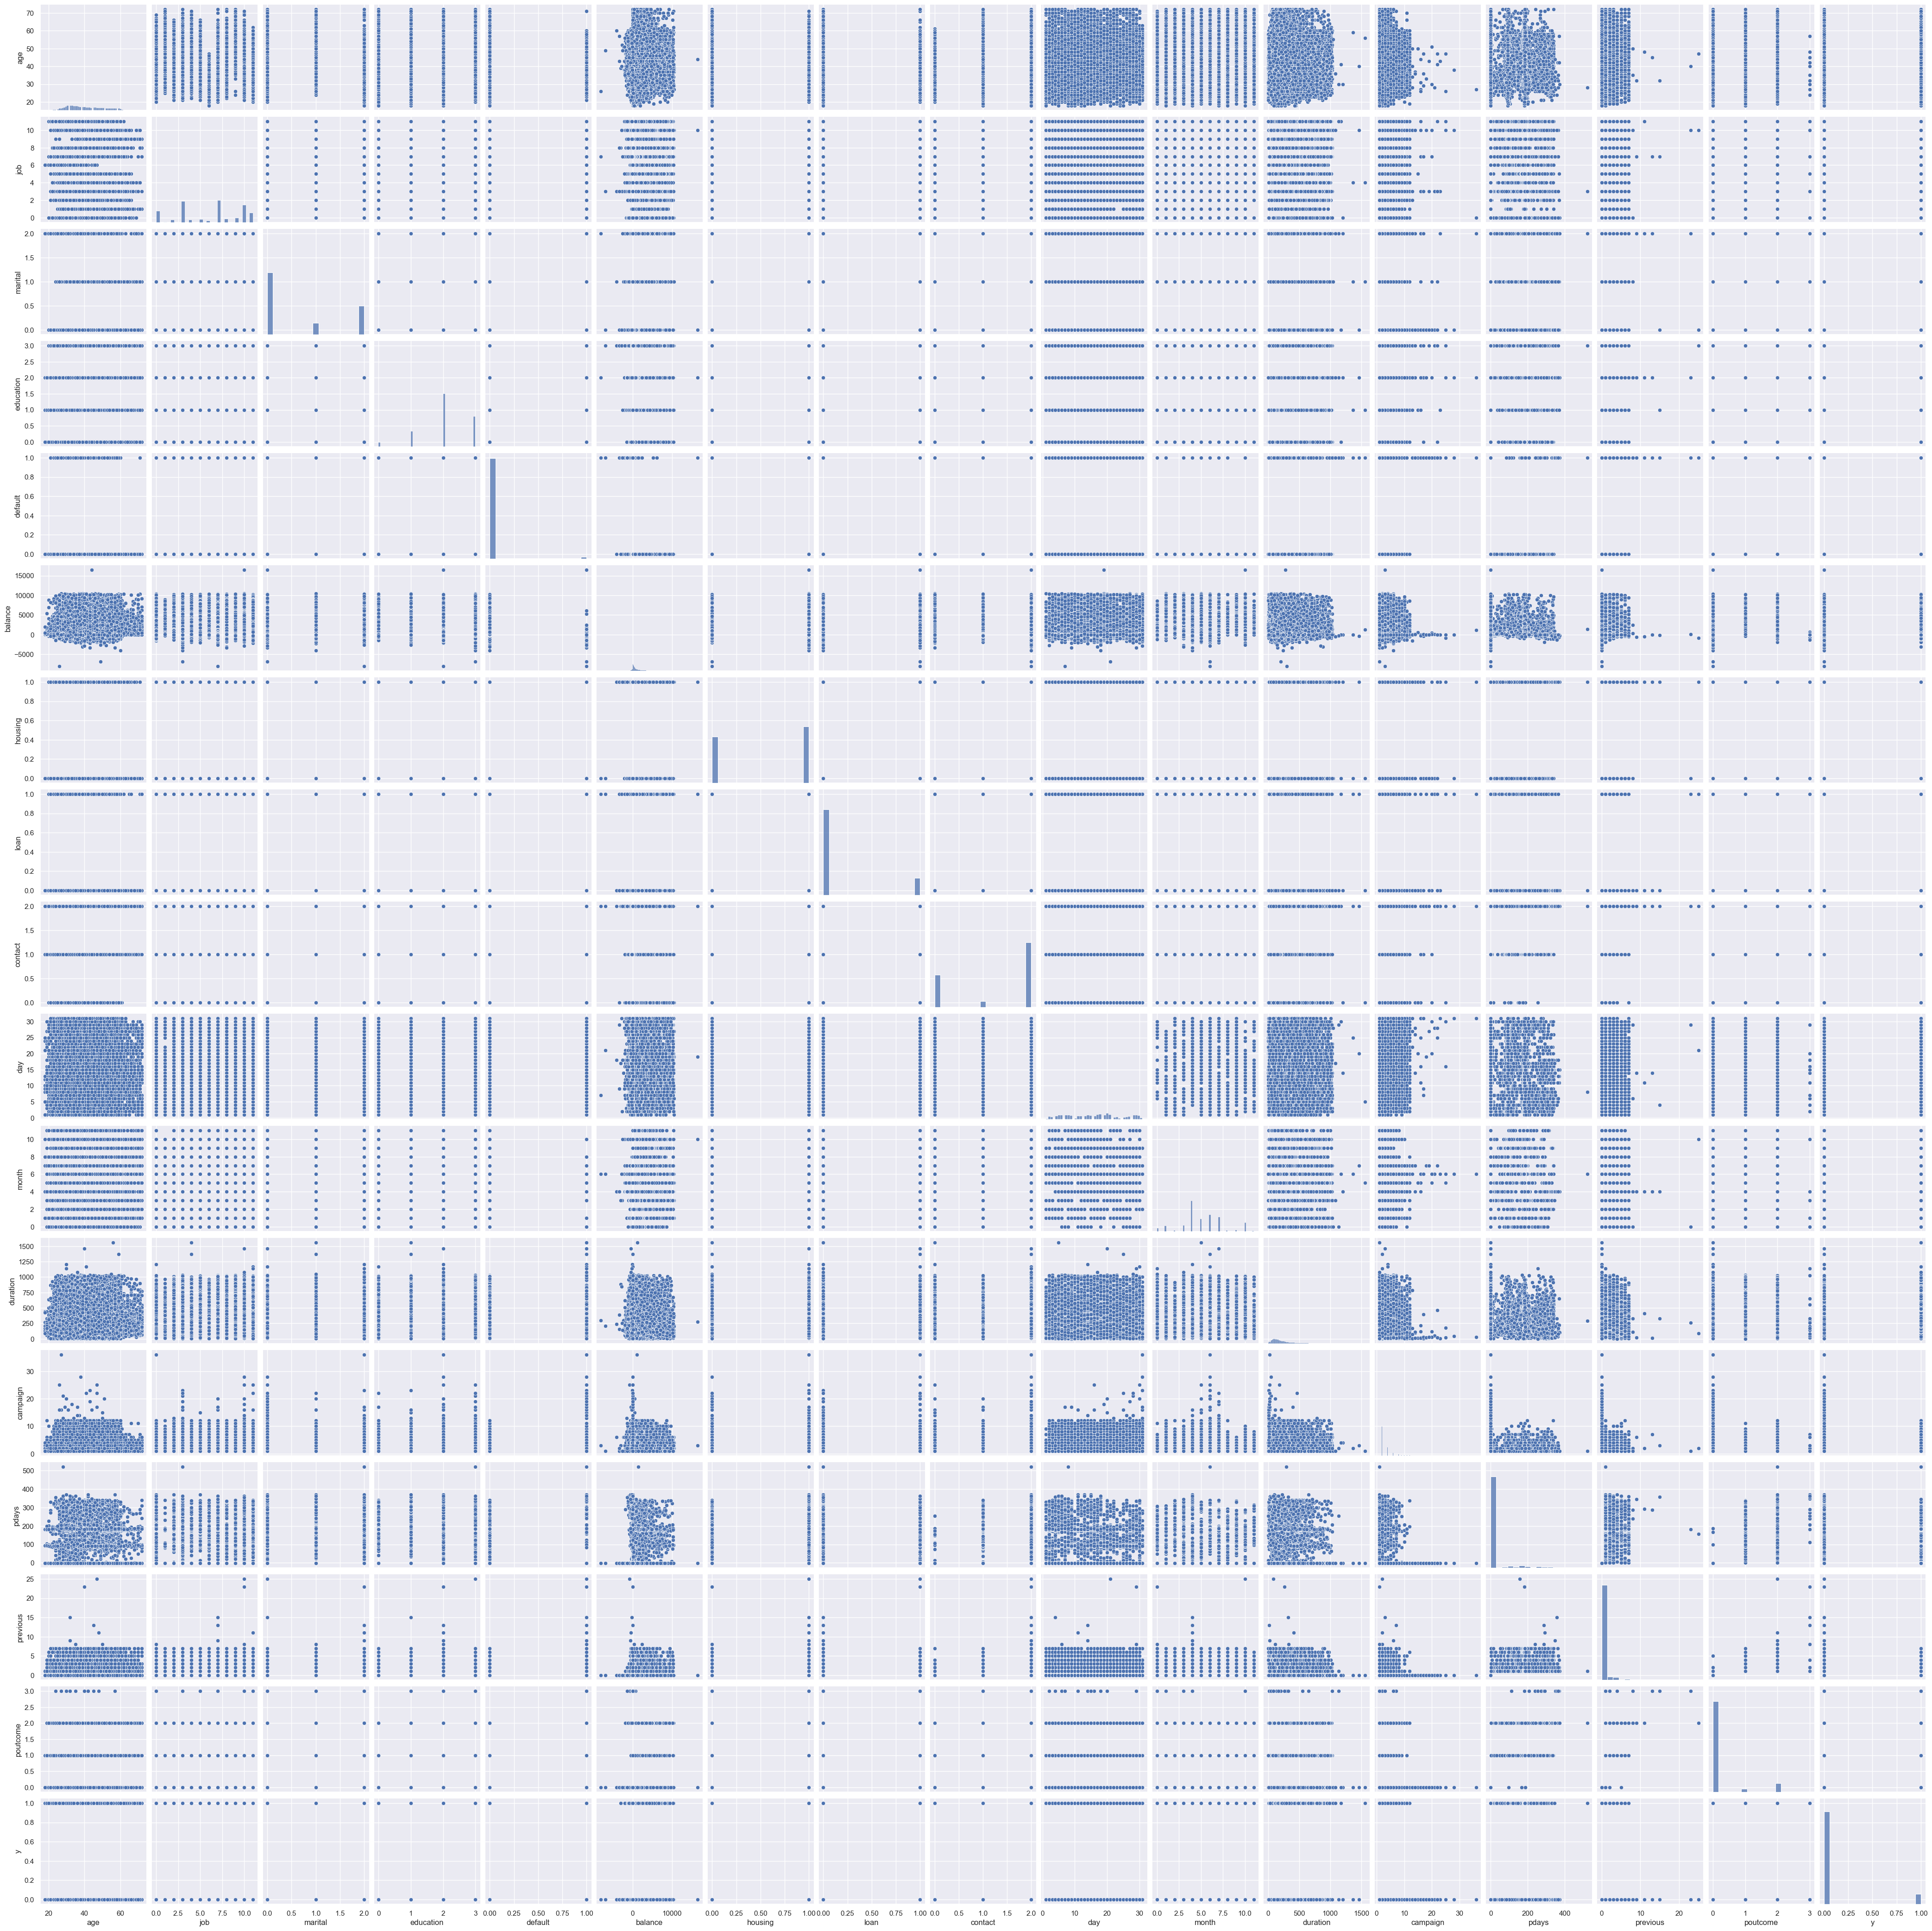

In [16]:
sns.pairplot(df)

# Preparación de datos para entrenamiento.

Viendo la matriz de correlación decidí que iba a borrar tanto la columna de los duración y día porque eran irrelevante debido a que no tiene nada que ver con la decisión final de un cliente en los datos.Posteriormente, me puse a realizar el entrenamiento, las predicciones y constrastra cuánto de cerca estaba, debajo enseño la foto de la matriz de confusión.
Por eso finalmente, no las voy a borrar debido a que probé con dejar todas las columnas y resulta que el modelo mejora en un 8%.

Además de disminuir el tamaño del set de datos que es demasiado para hacer pruebas y estudiar el caso de uso, en este caso, voy a generar un set de datos de alrededor a unas 10500 filas para el entrenamiento haciendo uso del criterior también.

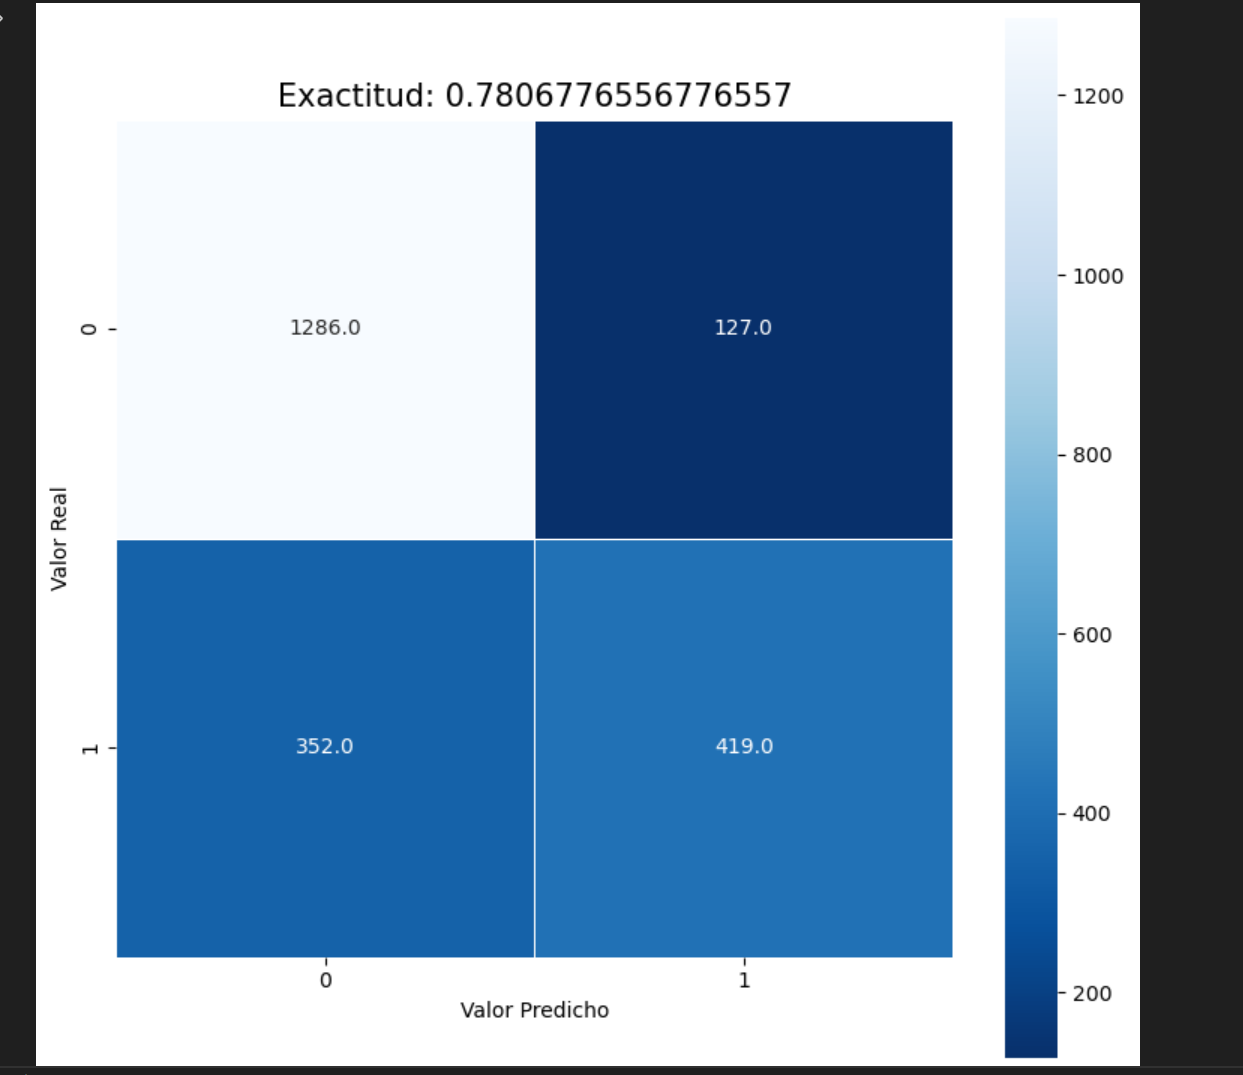

In [17]:
respuestaSi = df[(df['y']==1)]
df.drop(df[(df['y']==1)].index, inplace=True)

Obtenemos el 20% de los datos por mes siendo 'No' la respuesta.

In [18]:
meses = [0,1,2,3,4,5,6,7,8,9,10,11]
result = {}

for k in meses:
    result[k] = df.groupby('month').get_group(k).sample(frac=0.20)

In [19]:
# concateno todos los datos extraídos en la división por mes y uno también todas las filas cuya respuesta es sí con éstos.
X = pd.concat([result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7],result[8],result[9],result[10],result[11],respuestaSi], axis=0)
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
27812,28,2,2,2,0,23,0,0,2,28,0,154,1,-1,0,0,0
28612,33,3,2,3,0,-53,0,0,2,29,0,617,2,-1,0,0,0
28273,45,7,0,2,0,4022,1,0,2,29,0,244,3,-1,0,0,0
28112,48,10,0,2,0,0,0,0,2,28,0,221,4,-1,0,0,0
27846,37,10,0,2,0,3720,1,0,2,28,0,561,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37710,26,0,2,2,1,-930,1,0,2,14,4,786,1,-1,0,0,1
38434,39,5,0,3,1,-172,1,0,2,15,4,562,2,-1,0,0,1
40948,45,2,1,1,1,11,0,0,2,13,7,489,5,-1,0,0,1
41562,71,9,1,3,1,1236,1,0,2,14,8,335,4,-1,0,0,1


In [20]:
X.reset_index(drop=True, inplace=True)
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,28,2,2,2,0,23,0,0,2,28,0,154,1,-1,0,0,0
1,33,3,2,3,0,-53,0,0,2,29,0,617,2,-1,0,0,0
2,45,7,0,2,0,4022,1,0,2,29,0,244,3,-1,0,0,0
3,48,10,0,2,0,0,0,0,2,28,0,221,4,-1,0,0,0
4,37,10,0,2,0,3720,1,0,2,28,0,561,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10915,26,0,2,2,1,-930,1,0,2,14,4,786,1,-1,0,0,1
10916,39,5,0,3,1,-172,1,0,2,15,4,562,2,-1,0,0,1
10917,45,2,1,1,1,11,0,0,2,13,7,489,5,-1,0,0,1
10918,71,9,1,3,1,1236,1,0,2,14,8,335,4,-1,0,0,1


# Separación de datos y escalamiento de los mismos

Separamos los datos para train y test de manera que 20% va a ser test y 80% train.

Separo la Y de la X para escalar y posteriormente dividir entre train y test.

In [21]:
y = X['y']
X.drop('y', axis=1 ,inplace=True)

Muestro los datos antes de escalar.

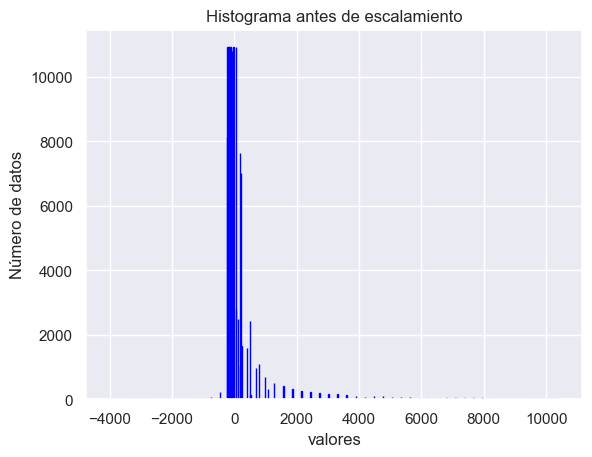

In [22]:
plt.hist(X, 50, edgecolor='blue')
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma antes de escalamiento')
plt.show()

Escalo toda la X.

In [23]:
# escalamos los datos haciendo uso del escalador MaxAbsScaler
scaler =MaxAbsScaler()
X[X.columns] = scaler.fit_transform(X)
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.388889,0.181818,1.0,0.666667,0.0,0.002198,0.0,0.0,1.0,0.903226,0.000000,0.098845,0.027778,-0.001919,0.000,0.000000
1,0.458333,0.272727,1.0,1.000000,0.0,-0.005065,0.0,0.0,1.0,0.935484,0.000000,0.396021,0.055556,-0.001919,0.000,0.000000
2,0.625000,0.636364,0.0,0.666667,0.0,0.384329,1.0,0.0,1.0,0.935484,0.000000,0.156611,0.083333,-0.001919,0.000,0.000000
3,0.666667,0.909091,0.0,0.666667,0.0,0.000000,0.0,0.0,1.0,0.903226,0.000000,0.141849,0.111111,-0.001919,0.000,0.000000
4,0.513889,0.909091,0.0,0.666667,0.0,0.355471,1.0,0.0,1.0,0.903226,0.000000,0.360077,0.027778,-0.001919,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10915,0.361111,0.000000,1.0,0.666667,1.0,-0.088868,1.0,0.0,1.0,0.451613,0.363636,0.504493,0.027778,-0.001919,0.000,0.000000
10916,0.541667,0.454545,0.0,1.000000,1.0,-0.016436,1.0,0.0,1.0,0.483871,0.363636,0.360719,0.055556,-0.001919,0.000,0.000000
10917,0.625000,0.181818,0.5,0.333333,1.0,0.001051,0.0,0.0,1.0,0.419355,0.636364,0.313864,0.138889,-0.001919,0.000,0.000000
10918,0.986111,0.818182,0.5,1.000000,1.0,0.118108,1.0,0.0,1.0,0.451613,0.727273,0.215019,0.111111,-0.001919,0.000,0.000000


Vuelvo a mostrar los datos pero ahora escalados.

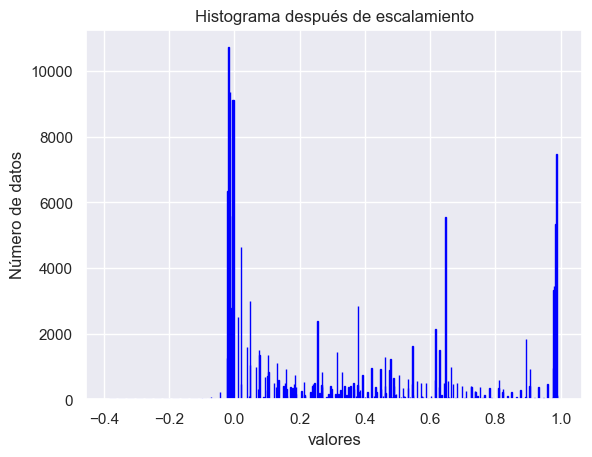

In [24]:
plt.hist(X, 50, edgecolor='blue')
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma después de escalamiento')
plt.show()

Por último divido los datos entre train y test.

In [25]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# separamos datos
x_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state =42)

# Elección de modelo

Para elegir el modelo a entrenar, voy ha hacer uso de la librería de lazy predict que te da un comienzo de
cuál modelo es el más adecuado para el caso de uso.

Primero instalamos la librería lazy predict y luego creo un objeto con los parámetros necesarios y entreno.

In [26]:
!pip install lazypredict

*Importante el lazy predict entrena con los parámetros de cada modelo a default.

In [27]:
# creamos intancia del objeto lazyClassifier y entrenamos para ver los modelos
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:20<00:00,  1.39it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.86,0.85,0.85,0.86,0.11
XGBClassifier,0.86,0.85,0.85,0.86,0.31
RandomForestClassifier,0.85,0.84,0.84,0.85,0.99
ExtraTreesClassifier,0.84,0.82,0.82,0.84,0.78
BaggingClassifier,0.83,0.82,0.82,0.83,0.39
SVC,0.83,0.81,0.81,0.83,2.41
AdaBoostClassifier,0.83,0.81,0.81,0.83,0.46
NuSVC,0.81,0.79,0.79,0.81,3.30
DecisionTreeClassifier,0.80,0.79,0.79,0.80,0.05


# Hiperparametrización

Teniendo una vista de los modelos con mejor precisión anteriormente gracias al lazy predict, he decidido que voy a elegir el modelo LGBM Classifier, luego me encargo ahora de realizar la hiperparametrización del modelo y ver los mejores parámetros.

In [28]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier

# Definimos los hiperparámetros y rangos
param_dist = {
    'boosting_type': ['gbdt', 'dart', 'goss', 'rf'],
    'num_leaves': sp_randint(20, 500),
    'learning_rate': sp_uniform(0.01, 0.3),
    'subsample': sp_uniform(0.5, 1),
    'colsample_bytree': sp_uniform(0.5, 1),
    'reg_alpha': sp_uniform(0, 10),
    'reg_lambda': sp_uniform(0, 10),
    'n_estimators': sp_randint(100, 1000),
}

# Crear el clasificador LGBM
lgbm = LGBMClassifier(random_state=42)

# construimos la instancia de la búsqueda aleatoria
n_iter_search = 50
random_search = RandomizedSearchCV(
    lgbm,
    param_distributions=param_dist,
    n_iter=n_iter_search,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
)

# entrenamos para buscar el mejor modelo
random_search.fit(x_train, y_train)

# muestro los mejores parámetros y la precisión
print("Mejores parámetros encontrados:")
print(random_search.best_params_)
print("Mejor puntuación de validación cruzada encontrada:")
print(random_search.best_score_)

Mejores parámetros encontrados:
{'boosting_type': 'gbdt', 'colsample_bytree': 0.7017192023353962, 'learning_rate': 0.2787290787020558, 'n_estimators': 340, 'num_leaves': 71, 'reg_alpha': 5.6327557197638365, 'reg_lambda': 6.955160864261275, 'subsample': 0.6393314544058757}
Mejor puntuación de validación cruzada encontrada:
0.8630947593717376


# Entrenamiento del modelo

Escojo el mejor modelo de la hiperparametrización, realizo la técnica de validación cruzada para hacer que el porcentaje de error sea menor y lo entreno.

In [29]:
from sklearn.model_selection import cross_val_score

modelo = random_search.best_estimator_ 
# realizamos la validación cruzada
cv_scores = cross_val_score(lgbm, X, y, cv=5, scoring='accuracy')
# Mostramos los resultados
print("Puntuaciones de la validación cruzada:")
print(cv_scores)
print("Exactitud media:", np.mean(cv_scores))
print("Desviación estándar:", np.std(cv_scores))
modelo.fit(x_train,y_train)


Puntuaciones de la validación cruzada:
[0.18727106 0.68177656 0.6996337  0.63873626 0.53754579]
Exactitud media: 0.5489926739926739
Desviación estándar: 0.18939469138770398


LGBMClassifier(colsample_bytree=0.7017192023353962,
               learning_rate=0.2787290787020558, n_estimators=340,
               num_leaves=71, random_state=42, reg_alpha=5.6327557197638365,
               reg_lambda=6.955160864261275, subsample=0.6393314544058757)

# Predicciones

Hago predicciones con X_test para possteriormente poder ver cuanto ha acertado el modelo contrastando estos resultados con los reales.

In [30]:
y_pred = modelo.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

# Visualización de características 

Pequeña gráfica de barras que me gusta mostrar para ver cuales han sido las menos importantes durante el entrenamiento.

<AxesSubplot:>

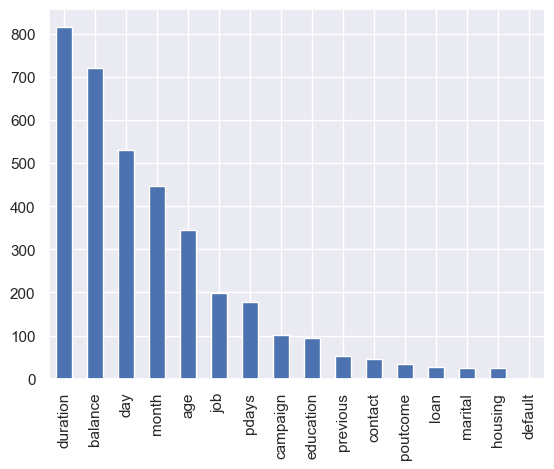

In [31]:
feature_importances = pd.Series(modelo.feature_importances_, index=  X.columns).sort_values(ascending=False)
# Plot a simple bar chart
feature_importances.plot.bar()

# Accuracy

Obtenemos la precisión del modelo, que concuerda con la precisión balanceada del entrenamiento con el lazy predict.

In [32]:
acc = modelo.score(X_test,y_test)
acc

0.8598901098901099

# Matriz de Confusión

Generamos la matriz de confusión para poder constrastar los datos de la predicción con los reales, pudiendo ver cuánto ha acertado.

Text(0.5, 1.0, 'Exactitud: 0.8598901098901099')

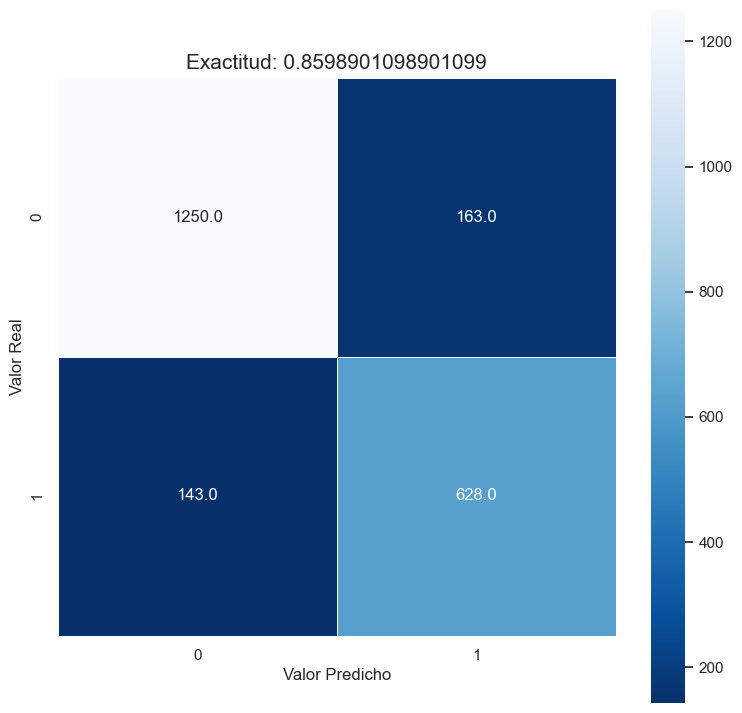

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r',yticklabels=[0,1],xticklabels=[0,1])
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
all_sample_title = 'Exactitud: {0}'.format(acc)
plt.title(all_sample_title, size = 15)

# Exportación del modelo y del escalador

Exportamos el modelo y escalador para usarlos en la aplicación web.

In [34]:
import joblib

joblib.dump(modelo,'Modelo_entrenado_suscripción.pkl')
joblib.dump(scaler,'escalador_suscripción.pkl')

['escalador_suscripción.pkl']

# Conslusión

Ha sido un caso de uso muy interesante para averiguar la opinión de los clientes de un banco acerca del nuevo producto que vayan a ofertar, finalmente vemos como nuestro modelo tiene un gran porcenatje de acierto, lo cuál no está nada mal.Sin embargo, creo que a lo mejor se podría mejorar el set de datos yo creo que indicando a lo mejor más características de los clientes como por ejemplo: el lugar de dónde es que te puede indicar si la persona al vivir en una zona de clase alta pues su opinión va a ser positiva, saber la cantidad que gasta mensualmente puede ayudar a que sea más preciso el modelo aunque ya los es. 

No obstante, se puede apreciar que no tienen una segmentación de clientes, por lo tanto voy a generar otro caso de uso de segmentación de clientes, siendo un problema de clustering e incluso comparar que es más acertado si un modelo neuronal o un modelo de machine leraning. 